In [1]:
from src.Game import Game
from src.Players.Minesweeper_bot import Minesweeper_bot
from src.UI.GUI_Bot_Inputs import GUI_Bot_Inputs
from src.UI.No_UI import No_UI
from src.Grid import Grid

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from tqdm.notebook import tqdm
import numpy as np
from scipy.stats import beta as beta_law
import matplotlib.pyplot as plt

In [2]:
n_game = 100
mine_percent = 0.12
grid_size = 10

def winrate(n_game, mine_percent, grid_size):
    results = []
    for i in range(n_game):
        grid = Grid(grid_size, grid_size, mine_percent)
        game = Game(grid)
        bot = Minesweeper_bot()
        result = No_UI().start(game, bot)
        results.append(result)
    return np.mean(results)

In [4]:
from multiprocessing.pool import ThreadPool
import threading
import time


n_game = 50
mine_percent = np.linspace(0.05, 0.4, 100)
grid_size = 10

def func(p):
    return winrate(n_game, p, grid_size)


In [9]:
max_workers = 8
with ThreadPool(processes=max_workers) as pool:
    # Submit all tasks to the executor
    results = list(pool.map(func, mine_percent))


In [34]:
def decreasing_upper_curve(array):
    result = [array[-1]]
    i = 0
    for i in range(1,len(array)):
        result.append(max(result[-1], array[-1-i]))
    return np.array(result[::-1])

def decreasing_lower_curve(array):
    return -decreasing_upper_curve(-np.array(array)[::-1])[::-1]

def decreasing_curve(array):
    return (decreasing_lower_curve(array) + decreasing_upper_curve(array))/2

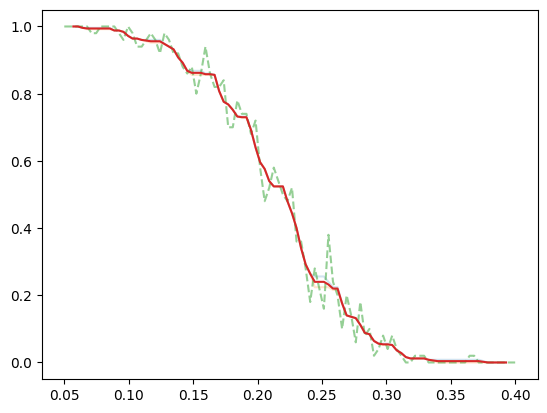

In [40]:
y = np.convolve(
    results,
    np.ones((5,))/5,
    mode='valid'
)

plt.plot(mine_percent[2: -2], decreasing_upper_curve(y), alpha=0.2)
plt.plot(mine_percent[2: -2], decreasing_lower_curve(y), alpha=0.2)
plt.plot(mine_percent, results, alpha=0.5, linestyle='--')
plt.plot(mine_percent[2: -2], decreasing_curve(y))


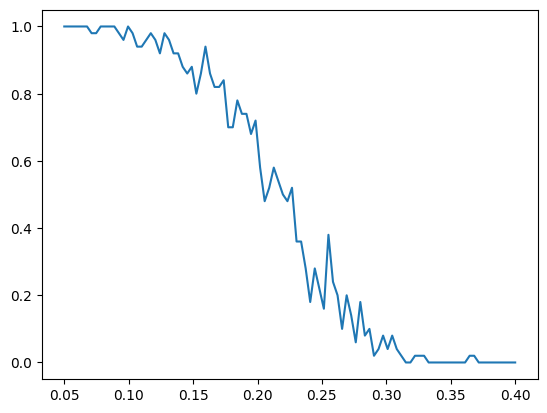

In [10]:
plt.plot(mine_percent, results)